# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [16]:
#The probability that the cookie obtained is from bowl 1 if we know it is vanilla
P(Bowl1 | Vanilla) = P(Vanilla | Bowl1 ) * P(Bowl1) / P(Vanilla)

P(Vanilla | Bowl1) = 0.75
P(Vanilla | Bowl2) = 0.5
P(Bowl1) = 0.5
P(Bowl2) = 0.5

P(Vanilla) = P(Vanilla | Bowl1) * P(Bowl1) + P(Vanilla | Bowl2) * P(Bowl2) = 0.75 * 0.5 + 0.5 * 0.5 = 0.625

P(Bowl1 | Vanilla) = 0.75 * 0.5 / 0.625 = 0.6

SyntaxError: can't assign to function call (<ipython-input-16-cefba1d36f7e>, line 2)

In [17]:
#or (different approach):

def bayes_rule(priors,likelihoods):
    marg=sum(np.multiply(priors,likelihoods))
    post=np.divide(np.multiply(priors,likelihoods),marg)
    return post

priors=[0.5,0.5]
likelihoods=[0.75,0.5]

posteriors=bayes_rule(priors,likelihoods)

In [18]:
posteriors

array([0.6, 0.4])

In [19]:
print(f'The probability that the cookie obtained is from bowl 1 if we know it is vanilla is {posteriors[0]}.')

The probability that the cookie obtained is from bowl 1 if we know it is vanilla is 0.6.


What is the probability that it came from Bowl 2?

In [20]:
#The probability that the cookie obtained is from bowl 2 if we know it is vanilla
P(Bowl2 | Vanilla) = P(Vanilla | Bowl2 ) * P(Bowl2) / P(Vanilla) = 0.5 * 0.5 / 0.625 = 0.4

SyntaxError: can't assign to function call (<ipython-input-20-65d7cacd3de8>, line 2)

In [21]:
#or (different approach):

print(f'The probability that the cookie obtained is from bowl 1 if we know it is vanilla is {posteriors[1]}.')

The probability that the cookie obtained is from bowl 1 if we know it is vanilla is 0.4.


What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [22]:
#The probability that the cookie obtained is from bowl 1 if we know it is chocolate
P(Bowl1 | Chocolate) = P(Chocolate | Bowl1 ) * P(Bowl1) / P(Chocolate)

P(Chocolate | Bowl1) = 0.25
P(Chocolate | Bowl2) = 0.5
P(Bowl1) = 0.5
P(Bowl2) = 0.5

P(Chocolate) = P(Chocolate | Bowl1) * P(Bowl1) + P(Chocolate | Bowl2) * P(Bowl2) = 0.25 * 0.5 + 0.5 * 0.5 = 0.375

P(Bowl1 | Chocolate) = 0.25 * 0.5 / 0.375 = 1/3

SyntaxError: can't assign to function call (<ipython-input-22-cfd124ca0adf>, line 2)

In [23]:
#or (different approach):

priors=[0.5,0.5]
likelihoods=[0.25,0.5]

posteriors=bayes_rule(priors,likelihoods)

print(f'The probability that the cookie obtained is from bowl 1 if we know it is chocolate is {posteriors[0]}.')

The probability that the cookie obtained is from bowl 1 if we know it is chocolate is 0.3333333333333333.


In [24]:
#The probability that the cookie obtained is from bowl 2 if we know it is chocolate
P(Bowl2 | Chocolate) = P(Chocolate | Bowl2 ) * P(Bowl2) / P(Chocolate) = 0.5 * 0.5 / 0.375 = 2/3

SyntaxError: can't assign to function call (<ipython-input-24-66c991be7a21>, line 2)

In [25]:
#or (different approach):

print(f'The probability that the cookie obtained is from bowl 2 if we know it is chocolate is {posteriors[1]}.')

The probability that the cookie obtained is from bowl 2 if we know it is chocolate is 0.6666666666666666.


## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [26]:
# The probability that the candle obtained is from bowl 1 if we know it is yellow

priors = [0.5, 0.5]
likelihoods =[(0.2*0.2),(0.14*0.1)]

posteriors = bayes_rule(priors,likelihoods)

print(f'The probability that the candle obtained is from bowl 1 if we know it is yellow is {posteriors[0]}.')

The probability that the candle obtained is from bowl 1 if we know it is yellow is 0.7407407407407408.


What is the probability that the yellow candy came from Bag 2?

In [27]:
# The probability that the candle obtained is from bowl 2 if we know it is yellow

print(f'The probability that the candle obtained is from bowl 2 if we know it is yellow is {posteriors[1]}.')

The probability that the candle obtained is from bowl 2 if we know it is yellow is 0.25925925925925924.


What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [28]:
# The probability that the candle obtained is from bowl 1 if we know it is green

likelihoods =[(0.14*0.1),(0.2*0.2)]

posteriors = bayes_rule(priors,likelihoods)

print(f'The probability that the candle obtained is from bowl 1 if we know it is green {posteriors[0]}.')

The probability that the candle obtained is from bowl 1 if we know it is green 0.25925925925925924.


In [29]:
# The probability that the candle obtained is from bowl 2 if we know it is green

print(f'The probability that the candle obtained is from bowl 2 if we know it is green {posteriors[1]}.')

The probability that the candle obtained is from bowl 2 if we know it is green 0.7407407407407408.


## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [32]:
#Following Information is available

I select Door A
Car: which door the car is behind (C=A,B or C)
H: which door Monty Hall opens(Monty Hall opens Door B)
    
p(Car = A) = p(Car =B) = p(Car = C) = 1/3 #probability of hypothesis of getting a car is supposingly always 1/3 before I even start playing
    
p(H=B | Car=A) = .5 #probabilities of Monty Hall opens Door B if car is behind A, B and C
p(H=B | Car=B) = 0
p(H=B | Car=C) = 1

# Probabilities of me winning the car if I stick with Door A vs. if you switch to Door C

p(Car=C | H=B)=?
p(Car=A | H=B)=?

p(Car=C | H=B)= p(H=B | Car=C) * p(Car=C) / p(H=B) = p(H=B | Car=C) * p(Car=C) / p(H=B | Car=A) * p(H=A) + p(H=B | Car=B) * p(H=B) + p(H=B | Car=C) * p(H=C) = 
1 * (1/3) / (1/2)*(1/3)+ 0*(1/3) + 1*(1/3) = 2/3

p(Car=A | H=B)= (1/2)*(1/3) / (1/2)*(1/3) + 0*(1/3) + 1*(1/3) = 1/3

SyntaxError: invalid syntax (<ipython-input-32-2573187eaadd>, line 3)

In [36]:
#or (other approach)
priors=[1/3,1/3,1/3] #p(Car = A) = p(Car =B) = p(Car = C) = 1/3
likelihoods=[0.5,0,1] #p(H=B | Car=A), p(H=B | Car=B),p(H=B | Car=C)

posteriors=bayes_rule(priors,likelihoods)

#Probability of me winning the car if I stick with Door A

print(f'The probability of me winning the car if I stick with Door A is {posteriors[0]}.')

#Probability of me winning the car if I switch to Door C

print(f'The probability of me winning the car if I switch to Door C is {posteriors[2]}.')

The probability of me winning the car if I stick with Door A is 0.3333333333333333.
The probability of me winning the car if I switch to Door C is 0.6666666666666666.


## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

In [45]:
#Prior to seeing any traffic I have no idea what to expect so I will start with the assumption 
#that all percentages are equally likely. I set up a uniform prior to represent the fact that 
#every rate has an equal chance of being the actual rate of purchase.

n_draws = 100000
prior = pd.Series(np.random.uniform(0, 1, size=n_draws))

In [46]:
observed = 14

In [47]:
def generative_model(param):
    result = np.random.binomial(100, param)
    return result

In [48]:
sim_data = list()

for p in prior:
    sim_data.append(generative_model(p))

In [49]:
posterior = prior[list(map(lambda x: x == observed, sim_data))]

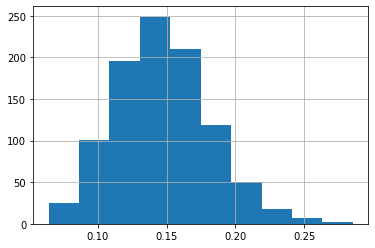

In [50]:
posterior.hist();

Produce a set of descriptive statistics for the posterior distribution.

In [51]:
posterior.describe()

count    977.000000
mean       0.147291
std        0.034671
min        0.063997
25%        0.124000
50%        0.145020
75%        0.169401
max        0.285547
dtype: float64

What is the 90% credible interval range?

In [56]:
print(f'The 90% credible interval range is {posterior.quantile(.025)} | {posterior.quantile(.975)}.') 

The 90% credible interval range is 0.08620429950835826 | 0.22107553290207488.


What is the Maximum Likelihood Estimate?